
## These are some visualised view of the spotify data.


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import plotly.express as px
from sklearn.cluster import DBSCAN


pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:

df_song = pd.read_csv('fs_by_song.csv')
df_artist = pd.read_csv('fs_by_artists.csv')
df_genres = pd.read_csv('fs_by_genres.csv')
df_year = pd.read_csv('fs_by_year.csv')
df_extend_genre = pd.read_csv('fs_by_extended_genre.csv')

### Created label encoders and replaced them with the label encdoded column, as there are some textual columns in each csv file which cannot be processed accurately in algorithms.

In [ ]:
def generate_label_encoder(df, column): 
    label_encoder = LabelEncoder()
    le = label_encoder.fit(df[column])
    return le

def replace_with_label_encoder(df, le, column):
    transformed_data = le.transform(df[column])
    label_encoded_reshaped = np.reshape(transformed_data, (transformed_data.shape[0], 1))
    df[column] = label_encoded_reshaped
    return df

def replace_with_original_column(df, le, column):
    df[column] = le.inverse_transform(df[column])
    return df


### To visualise the clusters properly, for different csv files and their features, I have used Kmeans.

In [ ]:

def get_kmeans(df, n_clusters, score_metric ='euclidean'):
    model = KMeans(n_clusters)
    model.fit(df)
    clust_labels = model.predict(df)
    cent = model.cluster_centers_
    return (clust_labels, cent)


Creating function for DBSCAN clustering algorithm

In [86]:
def dbscan_clusters(X, eps):
    dbscan = DBSCAN(eps=eps, min_samples=20)
    dbscan_model = dbscan.fit(X)
    clusters = dbscan.labels_
    y_pred = dbscan.fit_predict(X)
    return dict(model=dbscan_model,  clusters=clusters, pred = y_pred)

le = generate_label_encoder(df_artist, 'artists' )
df = replace_with_label_encoder(df_artist, le, 'artists')

ss = StandardScaler()
ss.fit_transform(df)

dbscan = dbscan_clusters(df, 0.2)
fig = px.scatter(df, x='artists', y='popularity',  color = dbscan['clusters'], size_max=30)
fig.update_layout(height=600, width= 600)
fig.show()

### Visualising the graph between the artists and duration of songs in milliseconds, the model is able to create clusters however they are not very much distant from one another.

       0
0      5
1      1
2      1
3      3
4      5
...   ..
10492  3
10493  5
10494  3
10495  0
10496  5

[10497 rows x 1 columns]


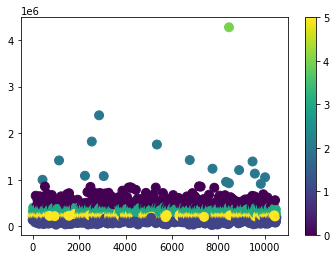

In [ ]:
le = generate_label_encoder(df_artist, 'artists' )
df = replace_with_label_encoder(df_artist, le, 'artists')

ss = StandardScaler()
ss.fit_transform(df)

clust_labels, cent = get_kmeans(df, 6)
kmeans = pd.DataFrame(clust_labels)
df.insert((df.shape[1]),'kmeans',kmeans)
fig = plt.figure()
ax = fig.add_subplot(111)
print(kmeans)
scatter = ax.scatter(df['artists'],df['duration_ms'], c=kmeans[0],s=80)
plt.colorbar(scatter)

In [88]:
le_genre = generate_label_encoder(df_genres, 'genres' )
df_gen = replace_with_label_encoder(df_genres, le_genre, 'genres')

print('dataframe with genres label encoded:',df_gen)
ss = StandardScaler()
ss.fit_transform(df_gen)

dbscan = dbscan_clusters(df_gen, 0.2)
fig = px.scatter(df_gen, x='genres', y='popularity',  color = dbscan['clusters'], size_max=60)
fig.update_layout(height=600, width = 700 )
fig.show()


dataframe with genres label encoded:       mode  genres  acousticness  danceability   duration_ms    energy  instrumentalness  liveness   loudness  speechiness       tempo   valence  popularity  kmeans
0        1       0      0.979333      0.162883  1.602977e+05  0.071317          0.606834  0.361600 -31.514333     0.040567   75.336500  0.103783   27.833333       3
1        1       1      0.494780      0.299333  1.048887e+06  0.450678          0.477762  0.131000 -16.854000     0.076817  120.285667  0.221750   52.500000       2
2        1       2      0.762000      0.712000  1.151770e+05  0.818000          0.876000  0.126000  -9.180000     0.047000  133.444000  0.975000   48.000000       3
3        1       3      0.676557      0.538961  1.906285e+05  0.316434          0.003003  0.172254 -12.479387     0.082851  112.110362  0.448249   45.820071       3
4        1       4      0.459210      0.516167  3.431965e+05  0.442417          0.849667  0.118067 -15.472083     0.046517  127.885750  0.

The bar graph of genres vs popularity indicates that there is a difference in popularity with the genre style.

In [ ]:
import plotly.express as px
fig = px.bar(df_gen[:100], x="genres", y="popularity", title='Genre vs popularity',color='genres')
fig.show()

### Visualised the various trends of the features of the music over the years.

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(
      x=df_year['year'],
      y=df_year['popularity'],
      mode='lines+markers',
      name='Popularity',
      marker_color='indianred'
  ))
fig.add_trace(go.Scatter(
      x=df_year['year'],
      y=df_year['loudness'],
      mode='lines+markers',
      name='loudness',
      marker_color='blue'
      ))
fig.add_trace(go.Scatter(
      x=df_year['year'],
      y=df_year['tempo'],
      mode='lines+markers',
      name='Tempo',
      marker_color='orange'
      ))
fig.add_trace(go.Scatter(
      x=df_year['year'],
      y=df_year['mode'],
      mode='lines+markers',
      name='Acoutsticness',
      marker_color='green'
      ))

fig.update_layout(xaxis_tickangle=-45,  xaxis_title=" Years ",
yaxis_title=" Trends of features ")
fig.show()